In [1]:
# ** ABSTRACT **
# El dataset elegido proviene de Kaggle, que a su vez está conformado por información reunida de diversas fuentes 
# (según la descripción del autor). Fuente: https://www.kaggle.com/datasets/jpmiller/police-violence-in-the-us
# Se trata de datos respecto de violencia policial en diferentes estados de los Estados Unidos entre los años 2000 y 2020 
# y cuenta con datos de las víctimas, tales como edad, etnia, género, etcétera.
# Nuestro objetivo es crear un modelo que permita predecir la cantidad de homicidios perpetrados por la policía
# en aquellos estados con una tasa de crímenes policiales por encima de la media. Nos enfocamos además en víctimas cuyo
# género es masculino, entre las edades de 22 y 38 años, y las etnias comprendidas en nuestro análisis son la 
# negra/afroamericana, blanca/europea y latina; dado que son las etnias más atacadas.
# Según Wikipedia: "En los Estados Unidos, la raza y la brutalidad policial siguen estando estrechamente vinculados, 
# y el fenómeno ha provocado una serie de disturbios raciales en los últimos años. Especialmente notable entre estos 
# incidentes fue el levantamiento causado por la detención y los golpes a Rodney King el 3 de marzo de 1991 por agentes 
# del Departamento de Policía de Los Ángeles. El ambiente fue particularmente volátil debido a que el hecho había sido 
# filmado por un espectador y ampliamente difundida después. El hecho de que los cuatro agentes de policía acusados de 
# asalto y otros cargos fueron absueltos, provocó que estallaran los Disturbios de Los Ángeles en 1992.
# Un extenso informe preparado para el Consejo de Derechos Humanos de las Naciones Unidas, presentado en 2006 afirma 
# que en Estados Unidos, la Guerra contra el Terrorismo ha creado un clima generalizado de impunidad hacia los agentes 
# del orden público, y ha contribuido a la erosión de lo que pocos mecanismos que existían para el control civil sobre 
# las fuerzas del orden. Como resultado, la brutalidad policial y los abusos han persistido sin cesar e impertérrita en 
# todo el país." https://es.wikipedia.org/wiki/Brutalidad_policial
# Nuestra motivación es hacer una diferencia en esta problemática que lleva mucho tiempo y afecta a toda la sociedad 
# estadounidense.  
# Audiencia: en general, toda la sociedad norteamericana para conocer cómo puede ir evolucionando la situación. 
# Si bien es una problemática conocida, queremos ir más allá para tener datos concretos y que se conozca en profundidad 
# esta realidad, y no quedar en la mera percepción de lo que se conoce a través de los medios (o, en el peor de los casos, 
# la ignorancia al respecto). En un nivel más específico, apuntamos a los responsables de políticas sociales, para que 
# puedan tomar estos datos y generar acciones concretas que ayuden a disminuir la violencia (por ejemplo, a través de 
# capacitaciones a las fuerzas policiales)

In [2]:
# ** DEFINICIÓN DE OBJETIVO **
# Somos embajadoras de la ONU, especialistas en problemáticas sociales. Vemos que los acontecimientos de violencia policial
# en los Estados Unidos, si bien es un tema de larga data, ocasionaron el cambio de rumbo político a través de protestas 
# de la población tras el asesinato de George Floyd y la popularización del movimiento Black Lives Matter. 
# Nos interesa conocer cómo se distribuyen los crímenes policiales en los diferentes estados y cuáles son aquellas etnias
# más afectadas en cada uno de ellos.

In [3]:
# ** CONTEXTO SOCIAL **
# La brutalidad policial es una de las violaciones de los derechos humanos más grave, perdurable y controversial 
# de Estados Unidos. El problema existe a nivel nacional y está institucionalizado. Por estos motivos, 
# el gobierno federal estadounidense (así como los gobiernos estatales y municipales, que tienen la obligación de respetar 
# las normas internacionales en materia de derechos humanos a las que está obligado Estados Unidos) merece rendir cuentas 
# ante los organismos internacionales de derechos humanos y la opinión pública internacional.

# En ciudades de todo Estados Unidos, los agentes de policía participan en tiroteos injustificados, palizas graves, 
# ahogamientos fatales y tratamientos físicos innecesariamente duros; mientras que sus superiores, los funcionarios 
# municipales y el Departamento de Justicia no actúan con decisión para contener o penalizar dichos actos o ni siquiera 
# para tener constancia de la magnitud del problema. Habitualmente, los agentes violentos (que suelen ser un pequeño porcentaje
# de los agentes de un cuerpo de policía) pueden ser objeto de denuncias reiteradas, pero sus compañeros y la mala calidad 
# de las investigaciones policiales internas suelen protegerles. Una víctima que busca resarcimiento se enfrenta a barreras 
# en cada etapa del proceso, obstáculos que van de la intimidación abierta a la reticencia de los fiscales locales y federales 
# a asumir los casos de brutalidad policial. Los abusos graves perduran debido a que los considerables obstáculos 
# al establecimiento de la responsabilidad hacen muy posible que los agentes que cometen violaciones de los derechos humanos 
# eludan el debido castigo y continúen su conducta abusiva.

# Fuente: Human Rights Watch: https://www.hrw.org/legacy/spanish/informes/1998/eeuu_policia.html

In [4]:
# ** PROBLEMA **
# Queremos entender con datos estadísticos esta problemática, buscando una mirada más objetiva y tangible,
# apartándonos de las noticias y de lo anecdótico.

In [5]:
# ** CONTEXTO ANALÍTICO **
# Nuestro análisis apunta a evaluar qué etnias y edades serán más afectadas. Buscamos profundizar en la etnia
# afroamericana para conocer cuáles grupos etarios son las principales víctimas de la violencia policial.

In [6]:
# ** PREGUNTAS **
# 1. ¿Cómo se distribuyen las etnias entre las víctimas de violencia policial en el dataset analizado?
# 2. ¿Cuáles son los rangos de edad más vulnerables a la violencia policial según la etnia?
# 3. ¿Qué estados tienen mayor cantidad de casos de violencia policial?

In [7]:
# ** HIPÓTESIS **
# Consideramos que, en una generalidad, la etnia más vulnerable a los ataques policiales es la comunidad afroamericana.
# También creemos que en cada estado va a haber una diferencia en cuanto al resto de las etnias víctimas de violencia policial. 
# Estimamos que los estados más violentos son los que se encuentran al sur del país debido a la cantidad de inmigrantes
# y la historia de racismo en esa región.

In [8]:
# Importamos librerías

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

In [9]:
# Importamos nuestro dataset

df_encounters= pd.read_csv('fatal_encounters_dot_org.csv')

In [10]:
# Completamos los NA de age con la media

df_encounters["Subject's age"] = df_encounters["Subject's age"].fillna(df_encounters["Subject's age"].mean(skipna=True))

In [11]:
# Redondeamos los valores de age que completamos con la media

df_encounters["Subject's age"] = round(df_encounters["Subject's age"], 0)

In [12]:
# VISUALIZACIONES

In [13]:
# ** Primera visualización **
# Histograma sobre la etnia de las víctimas

In [14]:
# Resumen numérico

resumen1 = df_encounters.value_counts(df_encounters["Subject's race"])
resumen1

Subject's race
European-American/White    9246
Race unspecified           8833
African-American/Black     6087
Hispanic/Latino            3685
Asian/Pacific Islander      433
Native American/Alaskan     283
Middle Eastern               49
dtype: int64

In [15]:
resumen2 = df_encounters["Subject's race"].count()
resumen2 

28616

In [16]:
resumen3 = (resumen1 / resumen2) * 100
resumen3

Subject's race
European-American/White    32.310595
Race unspecified           30.867347
African-American/Black     21.271317
Hispanic/Latino            12.877411
Asian/Pacific Islander      1.513140
Native American/Alaskan     0.988957
Middle Eastern              0.171233
dtype: float64

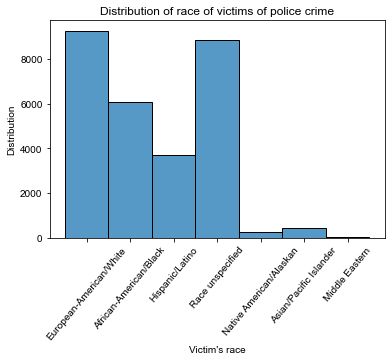

In [17]:
# Gráfico

import seaborn as sns
sns.histplot(data=df_encounters, x=df_encounters["Subject's race"])
plt.xlabel("Victim's race")
plt.ylabel("Distribution")
plt.title("Distribution of race of victims of police crime")
plt.xticks(rotation=50)
sns.set(rc = {'figure.figsize':(10,8)})

In [18]:
# Interpretación
# A pesar de que nuestra hipótesis inicial es que la etnia afroamericana es la más atacada, el gráfico indica que son los 
# blancos la mayoría de las víctimas. Sin embargo, un 30% de los casos de este dataset tienen la etnia sin especificar,
# con lo cual no podemos decir que es concluyente que los blancos son los más atacados.

In [19]:
# ** Segunda visualización **
# Histograma sobre grupos etarios más vulnerables según etnia

In [20]:
# Resumen numérico

resumen4 = df_encounters.value_counts(df_encounters["Subject's age"])
resumen4

Subject's age
35.0     1727
22.0      920
25.0      897
24.0      864
27.0      850
         ... 
93.0        1
95.0        1
97.0        1
101.0       1
107.0       1
Length: 98, dtype: int64

In [21]:
df_encounters["Subject's age"].describe()

count    28617.000000
mean        35.160289
std         13.552069
min          0.000000
25%         25.000000
50%         34.000000
75%         43.000000
max        107.000000
Name: Subject's age, dtype: float64

Text(0.5, 1.0, 'Distribution of victims by Age and Race')

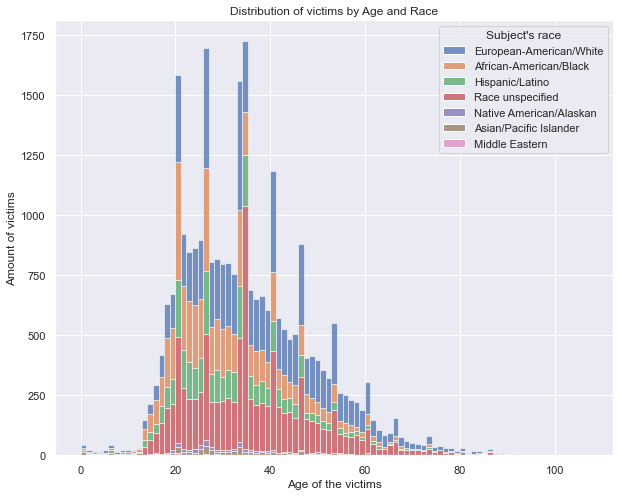

In [22]:
# Gráfico

import seaborn as sns
sns.histplot(data=df_encounters, x=df_encounters["Subject's age"], hue=df_encounters["Subject's race"], multiple="stack")
plt.xlabel("Age of the victims")
plt.ylabel("Amount of victims")
plt.title("Distribution of victims by Age and Race")

In [23]:
# Interpretación
# Podemos ver que la media es de 35 años, el primer cuartil está en torno a los 25 años, y el máximo es de 107 años. 

In [24]:
# Filtramos por etnia African-American/Black

resumen5 = df_encounters[df_encounters["Subject's race"] == "African-American/Black"]
resumen5

,Unique ID,Subject's name,Subject's age,Subject's gender,Subject's race,Subject's race with imputations,Imputation probability,URL of image of deceased,Date of injury resulting in death (month/day/year),Location of injury (address),...,A brief description of the circumstances surrounding the death,"Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS",Intentional Use of Force (Developing),Link to news article or photo of official document,"Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS",Video,Date&Description,Unique ID formula,Unique identifier (redundant),Date (Year)
1,25747.0,Mark A. Horton,21.0,Male,African-American/Black,African-American/Black,Not imputed,NaN,01/01/2000,Davison Freeway,...,Two Detroit men killed when their car crashed ...,Unreported,Pursuit,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25747.0,2000
2,25748.0,Phillip A. Blurbridge,19.0,Male,African-American/Black,African-American/Black,Not imputed,NaN,01/01/2000,Davison Freeway,...,Two Detroit men killed when their car crashed ...,Unreported,Pursuit,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25748.0,2000
4,1.0,LaTanya Janelle McCoy,24.0,Female,African-American/Black,African-American/Black,Not imputed,NaN,01/02/2000,5700 block Mack Road,...,LaTanya Janelle McCoy's car was struck from be...,Unknown,Pursuit,http://www.recordnet.com/article/20000110/A_NE...,No,NaN,1/2/2000: LaTanya Janelle McCoy's car was stru...,NaN,1.0,2000
6,25750.0,Billy Jones,30.0,Male,African-American/Black,African-American/Black,Not imputed,NaN,01/02/2000,Pollock Street,...,Officer Charles Rowe began pursuing Billie Jon...,Unreported,Pursuit,https://docs.google.com/document/d/1G106pI2URB...,No,NaN,1/2/2000: Officer Charles Rowe began pursuing ...,NaN,25750.0,2000
7,25751.0,Terry Rouse,29.0,Male,African-American/Black,African-American/Black,Not imputed,NaN,01/02/2000,Pollock Street,...,Officer Charles Rowe began pursuing Billie Jon...,Unreported,Pursuit,https://docs.google.com/document/d/1G106pI2URB...,No,NaN,1/2/2000: Officer Charles Rowe began pursuing ...,NaN,25751.0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28586,28589.0,Coleman Lamar Sample,23.0,Male,African-American/Black,African-American/Black,Not imputed,https://fatalencounters.org/wp-content/uploads...,08/12/2020,6308 Blakely Square,...,"At around 10:23 p.m., a trooper reported that ...",Pending investigation,No,https://www.wtkr.com/news/chase-suspect-in-vir...,No,NaN,"8/12/2020: At around 10:23 p.m., a trooper rep...",NaN,28589.0,2020
28589,28592.0,Rafael Jevon Minniefield,29.0,Male,African-American/Black,African-American/Black,Not imputed,NaN,08/13/2020,3143 US-29,...,"About 12:04 a.m., an officer spotted a 2002 Do...",Pending investigation,Yes,https://www.ajc.com/news/suspected-dui-driver-...,Drug or alcohol use,NaN,"8/13/2020: About 12:04 a.m., an officer spotte...",NaN,28592.0,2020
28595,28598.0,Anthony McClain,32.0,Male,African-American/Black,African-American/Black,Not imputed,https://fatalencounters.org/wp-content/uploads...,08/15/2020,Raymond Avenue and Grandview Street,...,Officers pulled over a car which was occupied ...,Pending investigation,Intentional use of deadly force,https://www.pasadenanow.com/main/breaking-pers...,No,NaN,8/15/2020: Officers pulled over a car which wa...,NaN,28598.0,2020
28597,28600.0,Kendrell Antron Watkins,31.0,Male,African-American/Black,African-American/Black,Not imputed,NaN,08/15/2020,15th Street and Martin Luther King Jr. Boulevard,...,Tuscaloosa police officers used a Taser to sub...,Pending investigation,Yes,https://www.tuscaloosanews.com/news/20200815/t...,Yes,NaN,8/15/2020: Tuscaloosa police officers used a T...,NaN,28600.0,2020


In [25]:
# Generamos la tabla de Age

resumen6 = resumen5.value_counts(df_encounters["Subject's age"])
resumen6

Subject's age
22.0     268
21.0     260
24.0     260
23.0     254
25.0     244
        ... 
70.0       1
87.0       1
92.0       1
93.0       1
107.0      1
Length: 89, dtype: int64

In [26]:
# Describe de edades

resumen5["Subject's age"].describe()

count    6087.000000
mean       31.334483
std        12.328875
min         0.000000
25%        22.000000
50%        29.000000
75%        38.000000
max       107.000000
Name: Subject's age, dtype: float64

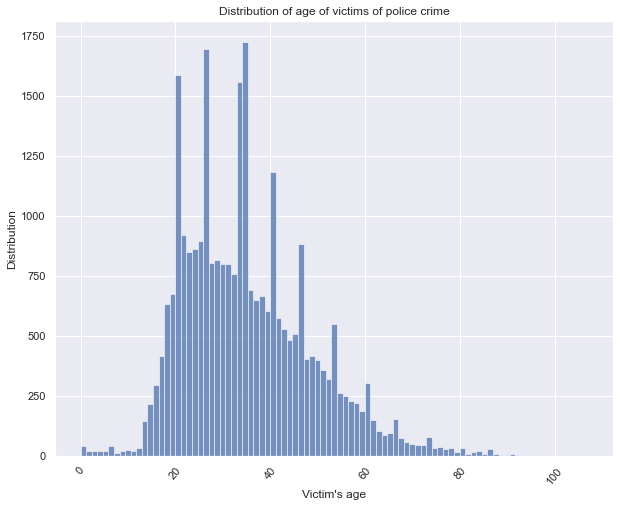

In [27]:
# Gráfico

import seaborn as sns
sns.histplot(data=df_encounters, x=df_encounters["Subject's age"])
plt.xlabel("Victim's age")
plt.ylabel("Distribution")
plt.title("Distribution of age of victims of police crime")
plt.xticks(rotation=50)
sns.set(rc = {'figure.figsize':(10,8)})

In [28]:
# Interpretación
# Podemos ver que, en el caso de las víctimas afroamericanas, la media es de 31 años (un poco menos que toda la población), 
# el primer cuartil está alrededor de los 22 años.

In [29]:
# Resumen numérico

In [30]:
# Generamos la tabla de muertes por año y por estado

state=df_encounters.value_counts(["Location of death (state)","Date (Year)"])
state

Location of death (state)  Date (Year)
CA                         2013           281
                           2015           268
                           2011           251
                           2005           245
                           2014           239
                                         ... 
SD                         2004             1
RI                         2005             1
NH                         2014             1
                           2010             1
RI                         2017             1
Length: 1035, dtype: int64

In [31]:
# Convertimos en df la tabla de muertes por estado y año

state2 = pd.DataFrame(state)
state2.columns =['deaths']
state2.reset_index(inplace=True)
state2.rename(columns = {'Location of death (state)':'State','Date (Year)':'Year'}, inplace = True)
state2

,State,Year,deaths
0,CA,2013,281
1,CA,2015,268
2,CA,2011,251
3,CA,2005,245
4,CA,2014,239
...,...,...,...
1030,SD,2004,1
1031,RI,2005,1
1032,NH,2014,1
1033,NH,2010,1


In [32]:
# Generamos la tabla de muertes por género

gender_df =df_encounters.value_counts(["Subject's gender"])
gender_df

Subject's gender
Male                25785
Female               2712
Transgender            19
dtype: int64

In [33]:
# Convertimos en df la tabla de muertes por género

gender_df2 = pd.DataFrame(gender_df)
gender_df2.columns =['Total_deaths']
gender_df2.reset_index(inplace=True)
gender_df2.rename(columns = {"Subject's gender":'Gender'}, inplace = True)
gender_df2

,Gender,Total_deaths
0,Male,25785
1,Female,2712
2,Transgender,19


<AxesSubplot:xlabel="Subject's gender">

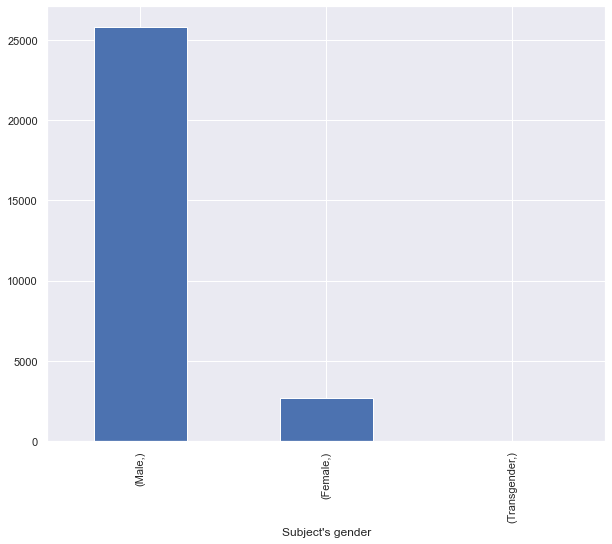

In [34]:
# Gráfico de barras de muertes por género (todas las etnias y edades incluidas)

gender_df.plot(kind = 'bar')

In [35]:
# Interpretación
# Vemos que gran mayoría de las víctimas son hombres. Menos de un 10% son mujeres, y en solo 19 de los casos las víctimas
# están identificadas como transgénero.

In [36]:
# PROYECTO DS ENTREGA III 

In [37]:
# Realizamos el feature selection de manera manual

In [38]:
df_encounters.describe()

,Unique ID,Subject's age,Location of death (zip code),Latitude,Longitude,Unique ID formula,Unique identifier (redundant),Date (Year)
count,28616.000000,28617.000000,28427.000000,28616.000000,28616.000000,2.000000,28616.000000,28617.000000
mean,14310.393311,35.160289,58434.101981,36.766732,-95.442548,28059.000000,14310.393311,2011.190272
std,8262.345824,13.552069,27982.480682,5.160425,16.340158,794.788022,8262.345824,5.838028
min,1.000000,0.000000,1013.000000,19.034681,-165.591880,27497.000000,1.000000,2000.000000
25%,7154.750000,25.000000,33160.000000,33.540840,-111.320045,27778.000000,7154.750000,2006.000000
50%,14311.500000,34.000000,60661.000000,36.692131,-90.556802,28059.000000,14311.500000,2012.000000
75%,21465.250000,43.000000,85044.000000,40.426043,-82.576292,28340.000000,21465.250000,2016.000000
max,28621.000000,107.000000,99921.000000,71.301250,-67.266033,28621.000000,28621.000000,2100.000000


In [39]:
# Cargamos la data de la población total por estado y año. Arriba habíamos creado el dataframe state2 con los estados 
# y cantidad de muertes. 

population_states= pd.read_csv('population_states.csv')
population_states

,State,Year,Population
0,AL,2000,4452173
1,AL,2001,4467634
2,AL,2002,4480089
3,AL,2003,4503491
4,AL,2004,4530729
...,...,...,...
1066,WY,2016,585243
1067,WY,2017,579994
1068,WY,2018,579054
1069,WY,2019,580116


In [40]:
# Hacemos un join del df de Muertes por estado junto con el de Population  

join_states = pd.merge(population_states, state2, on=['State', 'Year'], how='inner')
join_states

,State,Year,Population,deaths
0,AL,2000,4452173,11
1,AL,2001,4467634,12
2,AL,2002,4480089,15
3,AL,2003,4503491,24
4,AL,2004,4530729,22
...,...,...,...,...
1030,WY,2016,585243,3
1031,WY,2017,579994,5
1032,WY,2018,579054,7
1033,WY,2019,580116,3


In [41]:
# Calculamos la tasa de muertes cada 100 mil habitantes

join_states["death_rate_per_100kh"] = (join_states["deaths"] / join_states["Population"]) * 100000
join_states

,State,Year,Population,deaths,death_rate_per_100kh
0,AL,2000,4452173,11,0.247070
1,AL,2001,4467634,12,0.268599
2,AL,2002,4480089,15,0.334815
3,AL,2003,4503491,24,0.532920
4,AL,2004,4530729,22,0.485573
...,...,...,...,...,...
1030,WY,2016,585243,3,0.512608
1031,WY,2017,579994,5,0.862078
1032,WY,2018,579054,7,1.208868
1033,WY,2019,580116,3,0.517138


In [42]:
# Revisamos el describe de join_state para conocer los datos de tasa de muertes por cada 100mil habitantes

join_states.describe()

,Year,Population,deaths,death_rate_per_100kh
count,1035.000000,1.035000e+03,1035.000000,1035.000000
mean,2010.131401,6.218822e+06,27.648309,0.463001
std,6.055684,6.827838e+06,36.956192,0.262080
min,2000.000000,4.943000e+05,1.000000,0.029310
25%,2005.000000,1.828752e+06,7.000000,0.282608
50%,2010.000000,4.440306e+06,19.000000,0.420979
75%,2015.000000,7.165758e+06,34.000000,0.586804
max,2020.000000,3.943761e+07,281.000000,2.026247


In [43]:
# Calculamos la tasa de muerte promedio por estado

mean_death_rate = join_states.groupby(["State"])["death_rate_per_100kh"].mean()
mean_death_rate

State
AK    0.797150
AL    0.634776
AR    0.582398
AZ    0.610993
CA    0.586793
CO    0.573738
CT    0.180725
DC    0.676806
DE    0.376793
FL    0.427388
GA    0.527081
HI    0.375695
IA    0.410132
ID    0.437100
IL    0.391863
IN    0.390167
KS    0.661267
KY    0.423399
LA    0.622997
MA    0.134994
MD    0.418997
ME    0.361409
MI    0.401515
MN    0.285566
MO    0.704737
MS    0.660623
MT    0.471104
NC    0.294906
ND    0.398176
NE    0.512312
NH    0.220958
NJ    0.280483
NM    0.902072
NV    0.672488
NY    0.158886
OH    0.387798
OK    0.834726
OR    0.388904
PA    0.348088
RI    0.144447
SC    0.556764
SD    0.472812
TN    0.462628
TX    0.463614
UT    0.399208
VA    0.352837
VT    0.329586
WA    0.429461
WI    0.363070
WV    0.447662
WY    0.537863
Name: death_rate_per_100kh, dtype: float64

In [44]:
# Revisamos el describe de mean_death_rate para conocer los datos de tasa de muertes por cada 100mil habitantes

mean_death_rate.describe()

count    51.000000
mean      0.460509
std       0.171066
min       0.134994
25%       0.369383
50%       0.427388
75%       0.578068
max       0.902072
Name: death_rate_per_100kh, dtype: float64

In [45]:
# transformamos en dataframe

mean_death_rate_2 = pd.DataFrame(mean_death_rate)
mean_death_rate_2.columns =['Total_deaths']
mean_death_rate_2.reset_index(inplace=True)
mean_death_rate_2


,State,Total_deaths
0,AK,0.797150
1,AL,0.634776
2,AR,0.582398
3,AZ,0.610993
4,CA,0.586793
5,CO,0.573738
6,CT,0.180725
7,DC,0.676806
8,DE,0.376793
9,FL,0.427388


<AxesSubplot:xlabel='State'>

<Figure size 1400x700 with 0 Axes>

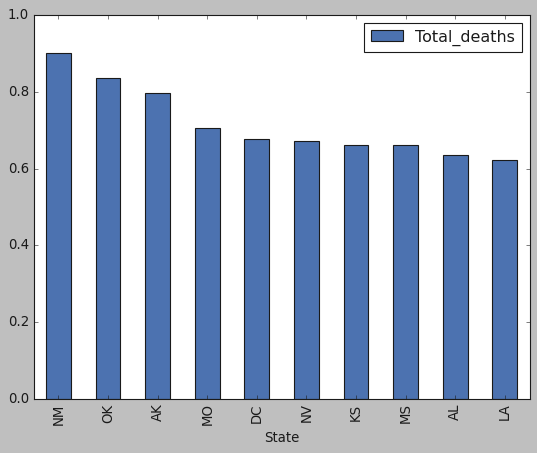

In [46]:
# Gráfico

mean_death_rate_3= mean_death_rate_2.sort_values(by='Total_deaths', ascending=False)
mean_death_rate_3= mean_death_rate_3.head(10)

mean_death_rate_3=mean_death_rate_3.set_index('State')
plt.style.use('classic')

fig = plt.figure(dpi=100, figsize=(14, 7)) #dpi=100 instead of dpi=256

mean_death_rate_3.plot(kind = 'bar')

In [47]:
# Generamos Race para conocer los datos de muertes por etnia, año y estado

race_year=df_encounters.value_counts(["Subject's race","Date (Year)","Location of death (state)"])
race_year

Subject's race           Date (Year)  Location of death (state)
Race unspecified         2005         CA                           119
                         2003         CA                           107
Hispanic/Latino          2015         CA                           101
                         2013         CA                           100
                         2017         CA                            98
                                                                  ... 
Native American/Alaskan  2019         IA                             1
                         2018         WA                             1
                                      UT                             1
                                      NV                             1
European-American/White  2001         LA                             1
Length: 3468, dtype: int64

In [48]:
# Convertimos Race a un df

race_year2 = pd.DataFrame(race_year)
race_year2.columns =['deaths']
race_year2.reset_index(inplace=True)
race_year2.rename(columns = {"Subject's race":'Race','Date (Year)':'Year','Location of death (state)':'State'}, inplace = True)
race_year2

,Race,Year,State,deaths
0,Race unspecified,2005,CA,119
1,Race unspecified,2003,CA,107
2,Hispanic/Latino,2015,CA,101
3,Hispanic/Latino,2013,CA,100
4,Hispanic/Latino,2017,CA,98
...,...,...,...,...
3463,Native American/Alaskan,2019,IA,1
3464,Native American/Alaskan,2018,WA,1
3465,Native American/Alaskan,2018,UT,1
3466,Native American/Alaskan,2018,NV,1


In [49]:
# Hacemos un join del df de Race junto con el de Population

join_states_race = pd.merge(race_year2, join_states, on=['State', 'Year'], how='inner')
join_states_race

,Race,Year,State,deaths_x,Population,deaths_y,death_rate_per_100kh
0,Race unspecified,2005,CA,119,35827943,245,0.683824
1,Hispanic/Latino,2005,CA,53,35827943,245,0.683824
2,European-American/White,2005,CA,32,35827943,245,0.683824
3,African-American/Black,2005,CA,28,35827943,245,0.683824
4,Asian/Pacific Islander,2005,CA,10,35827943,245,0.683824
...,...,...,...,...,...,...,...
3463,European-American/White,2002,VT,1,615442,1,0.162485
3464,European-American/White,2002,WY,1,500017,1,0.199993
3465,Race unspecified,2001,ME,1,1285692,2,0.155558
3466,European-American/White,2001,ME,1,1285692,2,0.155558


In [50]:
# Generamos Gender para conocer los datos de muertes por género, año y estado

gender=df_encounters.value_counts(["Subject's gender","Date (Year)","Location of death (state)"])
gender

Subject's gender  Date (Year)  Location of death (state)
Male              2013         CA                           256
                  2015         CA                           240
                  2011         CA                           230
                  2005         CA                           228
                  2012         CA                           218
                                                           ... 
                  2016         DE                             1
Female            2013         UT                             1
                               WI                             1
                               WV                             1
Transgender       2020         FL                             1
Length: 1774, dtype: int64

In [51]:
# Convertimos Gender a un df

gender2 = pd.DataFrame(gender)
gender2.columns =['deaths']
gender2.reset_index(inplace=True)
gender2.rename(columns = {"Subject's gender":'Gender','Date (Year)':'Year','Location of death (state)':'State'}, inplace = True)
gender2

,Gender,Year,State,deaths
0,Male,2013,CA,256
1,Male,2015,CA,240
2,Male,2011,CA,230
3,Male,2005,CA,228
4,Male,2012,CA,218
...,...,...,...,...
1769,Male,2016,DE,1
1770,Female,2013,UT,1
1771,Female,2013,WI,1
1772,Female,2013,WV,1


In [52]:
# Hacemos un join del df de Gender junto con el de Race+Population

state_pop_race_gender = pd.merge(join_states_race, gender2, on=['State', 'Year'], how='inner')
state_pop_race_gender

,Race,Year,State,deaths_x,Population,deaths_y,death_rate_per_100kh,Gender,deaths
0,Race unspecified,2005,CA,119,35827943,245,0.683824,Male,228
1,Race unspecified,2005,CA,119,35827943,245,0.683824,Female,16
2,Race unspecified,2005,CA,119,35827943,245,0.683824,Transgender,1
3,Hispanic/Latino,2005,CA,53,35827943,245,0.683824,Male,228
4,Hispanic/Latino,2005,CA,53,35827943,245,0.683824,Female,16
...,...,...,...,...,...,...,...,...,...
6309,European-American/White,2002,VT,1,615442,1,0.162485,Male,1
6310,European-American/White,2002,WY,1,500017,1,0.199993,Male,1
6311,Race unspecified,2001,ME,1,1285692,2,0.155558,Male,2
6312,European-American/White,2001,ME,1,1285692,2,0.155558,Male,2


In [53]:
# Generamos Age para conocer los datos de promedio de edad de las víctimas, junto con el dato de género, año y estado

age = df_encounters.groupby(["Subject's gender","Date (Year)","Location of death (state)"])["Subject's age"].mean()
age

Subject's gender  Date (Year)  Location of death (state)
Female            2000         AL                           36.0
                               AR                           35.0
                               CA                           34.0
                               CO                           47.5
                               FL                           27.4
                                                            ... 
Transgender       2018         TX                           28.0
                  2019         NY                           32.0
                               OR                           33.0
                  2020         CO                           33.0
                               FL                           38.0
Name: Subject's age, Length: 1774, dtype: float64

In [54]:
# Convertimos Age a un df

age2 = pd.DataFrame(age)
age2.columns =['Mean age']
age2.reset_index(inplace=True)
age2.rename(columns = {"Subject's gender":'Gender','Date (Year)':'Year','Location of death (state)':'State'}, inplace = True)
age2

,Gender,Year,State,Mean age
0,Female,2000,AL,36.0
1,Female,2000,AR,35.0
2,Female,2000,CA,34.0
3,Female,2000,CO,47.5
4,Female,2000,FL,27.4
...,...,...,...,...
1769,Transgender,2018,TX,28.0
1770,Transgender,2019,NY,32.0
1771,Transgender,2019,OR,33.0
1772,Transgender,2020,CO,33.0


In [55]:
# Hacemos un join del df de Age junto con el de Race+Population+Gender

full_df = pd.merge(state_pop_race_gender,age2, on=['State', 'Year','Gender'], how='inner')
full_df

,Race,Year,State,deaths_x,Population,deaths_y,death_rate_per_100kh,Gender,deaths,Mean age
0,Race unspecified,2005,CA,119,35827943,245,0.683824,Male,228,31.688596
1,Hispanic/Latino,2005,CA,53,35827943,245,0.683824,Male,228,31.688596
2,European-American/White,2005,CA,32,35827943,245,0.683824,Male,228,31.688596
3,African-American/Black,2005,CA,28,35827943,245,0.683824,Male,228,31.688596
4,Asian/Pacific Islander,2005,CA,10,35827943,245,0.683824,Male,228,31.688596
...,...,...,...,...,...,...,...,...,...,...
6309,European-American/White,2002,VT,1,615442,1,0.162485,Male,1,63.000000
6310,European-American/White,2002,WY,1,500017,1,0.199993,Male,1,42.000000
6311,Race unspecified,2001,ME,1,1285692,2,0.155558,Male,2,58.000000
6312,European-American/White,2001,ME,1,1285692,2,0.155558,Male,2,58.000000


In [56]:
# Filtramos el df que utilizaremos para entrenar el modelo según el perfil de población más atacado por la policía: 
# hombres entre 22 y 38 años. También filtramos los estados que tienen una tasa de homicidios policiales por encima de 
# la media (0.46 cada 100mil habitantes) y por debajo de 0.8 dado el comportamiento en el describe que teníamos unos máximos de 0.99 fuera de los quartiles de la variable

full_df_filtered = full_df[(full_df['Gender']  == "Male") & (full_df['death_rate_per_100kh'] >= 0.46) & (full_df['death_rate_per_100kh'] <= 0.8) & 
                    (full_df['Mean age'] >= 22) & (full_df['Mean age'] <= 38) ]
full_df_filtered

,Race,Year,State,deaths_x,Population,deaths_y,death_rate_per_100kh,Gender,deaths,Mean age
0,Race unspecified,2005,CA,119,35827943,245,0.683824,Male,228,31.688596
1,Hispanic/Latino,2005,CA,53,35827943,245,0.683824,Male,228,31.688596
2,European-American/White,2005,CA,32,35827943,245,0.683824,Male,228,31.688596
3,African-American/Black,2005,CA,28,35827943,245,0.683824,Male,228,31.688596
4,Asian/Pacific Islander,2005,CA,10,35827943,245,0.683824,Male,228,31.688596
...,...,...,...,...,...,...,...,...,...,...
6141,European-American/White,2008,VT,2,624151,3,0.480653,Male,3,26.333333
6142,Race unspecified,2008,VT,1,624151,3,0.480653,Male,3,26.333333
6263,Hispanic/Latino,2019,WY,1,580116,3,0.517138,Male,3,36.666667
6264,European-American/White,2019,WY,1,580116,3,0.517138,Male,3,36.666667


In [57]:
# Del df anterior, filtramos aquellas etnias más atacadas: europeo/blanco, afroamericano/negro, hispánico/latino

full_df_filtered_race = full_df_filtered[(full_df_filtered['Race'] == "European-American/White") | (full_df_filtered['Race'] == "Hispanic/Latino")| (full_df_filtered['Race'] == "African-American/Black")]
full_df_filtered_race

,Race,Year,State,deaths_x,Population,deaths_y,death_rate_per_100kh,Gender,deaths,Mean age
1,Hispanic/Latino,2005,CA,53,35827943,245,0.683824,Male,228,31.688596
2,European-American/White,2005,CA,32,35827943,245,0.683824,Male,228,31.688596
3,African-American/Black,2005,CA,28,35827943,245,0.683824,Male,228,31.688596
22,Hispanic/Latino,2003,CA,58,35253159,229,0.649587,Male,200,32.910000
23,European-American/White,2003,CA,31,35253159,229,0.649587,Male,200,32.910000
...,...,...,...,...,...,...,...,...,...,...
6133,European-American/White,2004,WY,2,509106,4,0.785691,Male,4,36.500000
6134,Hispanic/Latino,2004,WY,1,509106,4,0.785691,Male,4,36.500000
6141,European-American/White,2008,VT,2,624151,3,0.480653,Male,3,26.333333
6263,Hispanic/Latino,2019,WY,1,580116,3,0.517138,Male,3,36.666667


In [58]:
# Dropeamos las columnas de Deaths duplicadas que contienen totales que no son útiles para nuestro modelo

full_df_final = full_df_filtered_race.drop(columns=['deaths_y','deaths','Gender'])
full_df_final.rename(columns = {'deaths_x':'Deaths'}, inplace = True)
full_df_final

,Race,Year,State,Deaths,Population,death_rate_per_100kh,Mean age
1,Hispanic/Latino,2005,CA,53,35827943,0.683824,31.688596
2,European-American/White,2005,CA,32,35827943,0.683824,31.688596
3,African-American/Black,2005,CA,28,35827943,0.683824,31.688596
22,Hispanic/Latino,2003,CA,58,35253159,0.649587,32.910000
23,European-American/White,2003,CA,31,35253159,0.649587,32.910000
...,...,...,...,...,...,...,...
6133,European-American/White,2004,WY,2,509106,0.785691,36.500000
6134,Hispanic/Latino,2004,WY,1,509106,0.785691,36.500000
6141,European-American/White,2008,VT,2,624151,0.480653,26.333333
6263,Hispanic/Latino,2019,WY,1,580116,0.517138,36.666667


In [59]:
# Hacemos un describe de nuestro df final

full_df_final.describe()

,Year,Deaths,Population,death_rate_per_100kh,Mean age
count,635.000000,635.000000,6.350000e+02,635.000000,635.000000
mean,2010.651969,13.333858,9.456282e+06,0.587903,34.026425
std,5.554730,17.276067,1.046691e+07,0.089109,2.445119
min,2000.000000,1.000000,5.091060e+05,0.461609,23.000000
25%,2006.000000,2.000000,3.093935e+06,0.511001,32.661017
50%,2011.000000,6.000000,5.627367e+06,0.575089,34.206186
75%,2015.000000,17.000000,9.937295e+06,0.651115,35.846154
max,2020.000000,101.000000,3.943761e+07,0.798286,37.967742


In [60]:
# Generamos las columnas de Race a través de Get Dummies

full_df_encoded = pd.get_dummies(full_df_final, columns=['Race'],drop_first=False)
full_df_encoded

,Year,State,Deaths,Population,death_rate_per_100kh,Mean age,Race_African-American/Black,Race_European-American/White,Race_Hispanic/Latino
1,2005,CA,53,35827943,0.683824,31.688596,0,0,1
2,2005,CA,32,35827943,0.683824,31.688596,0,1,0
3,2005,CA,28,35827943,0.683824,31.688596,1,0,0
22,2003,CA,58,35253159,0.649587,32.910000,0,0,1
23,2003,CA,31,35253159,0.649587,32.910000,0,1,0
...,...,...,...,...,...,...,...,...,...
6133,2004,WY,2,509106,0.785691,36.500000,0,1,0
6134,2004,WY,1,509106,0.785691,36.500000,0,0,1
6141,2008,VT,2,624151,0.480653,26.333333,0,1,0
6263,2019,WY,1,580116,0.517138,36.666667,0,0,1


In [61]:
# Codificamos el estado a través de Label encoder

from sklearn.preprocessing import LabelEncoder #https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02
full_df_encoded['State_label_encoded']= LabelEncoder().fit_transform(full_df_encoded.State)
full_df_encoded

,Year,State,Deaths,Population,death_rate_per_100kh,Mean age,Race_African-American/Black,Race_European-American/White,Race_Hispanic/Latino,State_label_encoded
1,2005,CA,53,35827943,0.683824,31.688596,0,0,1,4
2,2005,CA,32,35827943,0.683824,31.688596,0,1,0,4
3,2005,CA,28,35827943,0.683824,31.688596,1,0,0,4
22,2003,CA,58,35253159,0.649587,32.910000,0,0,1,4
23,2003,CA,31,35253159,0.649587,32.910000,0,1,0,4
...,...,...,...,...,...,...,...,...,...,...
6133,2004,WY,2,509106,0.785691,36.500000,0,1,0,44
6134,2004,WY,1,509106,0.785691,36.500000,0,0,1,44
6141,2008,VT,2,624151,0.480653,26.333333,0,1,0,40
6263,2019,WY,1,580116,0.517138,36.666667,0,0,1,44


In [62]:
# Realizamos el cálculo de correlación de nuestras variables

full_df_encoded.corr()

,Year,Deaths,Population,death_rate_per_100kh,Mean age,Race_African-American/Black,Race_European-American/White,Race_Hispanic/Latino,State_label_encoded
Year,1.000000,0.204661,0.049478,0.135295,0.356691,0.027368,-0.014247,-0.013351,0.070427
Deaths,0.204661,1.000000,0.836921,0.043687,0.150937,-0.055283,0.057578,-0.004895,-0.217912
Population,0.049478,0.836921,1.000000,-0.065964,0.091516,0.018163,-0.081430,0.070775,-0.306570
death_rate_per_100kh,0.135295,0.043687,-0.065964,1.000000,0.053637,0.016685,-0.014989,-0.001166,-0.055179
Mean age,0.356691,0.150937,0.091516,0.053637,1.000000,0.035038,-0.058932,0.027931,0.067039
Race_African-American/Black,0.027368,-0.055283,0.018163,0.016685,0.035038,1.000000,-0.575987,-0.426537,-0.010721
Race_European-American/White,-0.014247,0.057578,-0.081430,-0.014989,-0.058932,-0.575987,1.000000,-0.493688,0.020411
Race_Hispanic/Latino,-0.013351,-0.004895,0.070775,-0.001166,0.027931,-0.426537,-0.493688,1.000000,-0.011178
State_label_encoded,0.070427,-0.217912,-0.306570,-0.055179,0.067039,-0.010721,0.020411,-0.011178,1.000000


In [63]:
# DESAFÍO DATA WRANGLING
# Segundo dataset con características económicas de USA desde 1980 hasta 2021

df_USA_Economics= pd.read_csv('macro_monthly.csv')
df_USA_Economics

,DATE,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi
0,1981-01-01,7.5,10.9,1612.900,4980.4,1870.0,NaN,12.568571,19.084516,NaN,51.1668,85.400
1,1981-02-01,7.4,10.8,1608.125,4965.0,1884.2,NaN,13.194444,15.934286,NaN,50.9509,85.900
2,1981-03-01,7.4,10.8,1629.400,4979.0,1902.9,NaN,13.115909,14.703871,NaN,51.2066,86.400
3,1981-04-01,7.2,10.9,1665.575,4965.1,1904.4,NaN,13.679524,15.719000,NaN,50.9711,87.000
4,1981-05-01,7.5,11.0,1655.150,4974.8,1913.8,NaN,14.099500,18.517742,NaN,51.2645,87.800
...,...,...,...,...,...,...,...,...,...,...,...,...
485,2021-06-01,5.9,9.5,20463.275,15603.3,15802.0,115.39,1.519091,0.078000,1579265.0,100.4704,278.140
486,2021-07-01,5.4,10.6,20589.975,15739.4,15804.8,117.01,1.318571,0.098065,1581128.0,101.2442,279.054
487,2021-08-01,5.2,9.9,20788.780,15723.0,15975.8,117.27,1.283182,0.092258,1596816.0,101.1061,279.338
488,2021-09-01,4.8,8.2,20981.450,15468.7,16076.4,117.16,1.374762,0.079333,1594756.0,100.0811,280.017


In [64]:
# Convertimos la columna a fecha 

df_USA_Economics["DATE"] = pd.to_datetime(df_USA_Economics["DATE"])

In [65]:
# Separamos el año

df_USA_Economics['Year'] = pd.DatetimeIndex(df_USA_Economics['DATE']).year
df_USA_Economics

,DATE,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi,Year
0,1981-01-01,7.5,10.9,1612.900,4980.4,1870.0,NaN,12.568571,19.084516,NaN,51.1668,85.400,1981
1,1981-02-01,7.4,10.8,1608.125,4965.0,1884.2,NaN,13.194444,15.934286,NaN,50.9509,85.900,1981
2,1981-03-01,7.4,10.8,1629.400,4979.0,1902.9,NaN,13.115909,14.703871,NaN,51.2066,86.400,1981
3,1981-04-01,7.2,10.9,1665.575,4965.1,1904.4,NaN,13.679524,15.719000,NaN,50.9711,87.000,1981
4,1981-05-01,7.5,11.0,1655.150,4974.8,1913.8,NaN,14.099500,18.517742,NaN,51.2645,87.800,1981
...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,2021-06-01,5.9,9.5,20463.275,15603.3,15802.0,115.39,1.519091,0.078000,1579265.0,100.4704,278.140,2021
486,2021-07-01,5.4,10.6,20589.975,15739.4,15804.8,117.01,1.318571,0.098065,1581128.0,101.2442,279.054,2021
487,2021-08-01,5.2,9.9,20788.780,15723.0,15975.8,117.27,1.283182,0.092258,1596816.0,101.1061,279.338,2021
488,2021-09-01,4.8,8.2,20981.450,15468.7,16076.4,117.16,1.374762,0.079333,1594756.0,100.0811,280.017,2021


In [66]:
# Dropeamos las columnas que no nos interesan para nuestro análisis. Renombramos las demás para que el indicador sea más claro.
# Reordenamos las columnas para que Year quede primera.

df_USA_Economics_2 = df_USA_Economics.drop(columns=['m2','reer','ir','ffer','tcs', 'indpro','ccpi','DATE'])
df_USA_Economics_2.rename(columns = {'unrate':'Unemployment Rate','psr':'Personal Saving Rate','dspic':'Real Disposable Personal Income','pce':'Personal Consumption Expenditures'}, inplace = True)
df_USA_Economics_2 = df_USA_Economics_2[['Year', 'Unemployment Rate', 'Personal Saving Rate', 'Real Disposable Personal Income', 'Personal Consumption Expenditures']]
df_USA_Economics_2

,Year,Unemployment Rate,Personal Saving Rate,Real Disposable Personal Income,Personal Consumption Expenditures
0,1981,7.5,10.9,4980.4,1870.0
1,1981,7.4,10.8,4965.0,1884.2
2,1981,7.4,10.8,4979.0,1902.9
3,1981,7.2,10.9,4965.1,1904.4
4,1981,7.5,11.0,4974.8,1913.8
...,...,...,...,...,...
485,2021,5.9,9.5,15603.3,15802.0
486,2021,5.4,10.6,15739.4,15804.8
487,2021,5.2,9.9,15723.0,15975.8
488,2021,4.8,8.2,15468.7,16076.4


In [67]:
# Calculamos la media de cada indicador por año

mean_USA_Economics = df_USA_Economics_2.groupby(["Year"])[["Unemployment Rate","Personal Saving Rate","Real Disposable Personal Income","Personal Consumption Expenditures"]].mean()
mean_USA_Economics

,Unemployment Rate,Personal Saving Rate,Real Disposable Personal Income,Personal Consumption Expenditures
Year,,,,
1981,7.616667,11.716667,5034.250000,1933.941667
1982,9.708333,12.041667,5145.391667,2071.241667
1983,9.600000,10.050000,5322.808333,2281.608333
1984,7.508333,11.325000,5688.058333,2492.333333
1985,7.191667,9.166667,5859.275000,2712.841667
1986,7.000000,8.825000,6081.841667,2886.275000
1987,6.175000,7.908333,6216.175000,3076.275000
1988,5.491667,8.475000,6508.583333,3330.000000
1989,5.258333,8.375000,6699.375000,3576.766667


In [68]:
df_USA_Economics_2.describe()

,Year,Unemployment Rate,Personal Saving Rate,Real Disposable Personal Income,Personal Consumption Expenditures
count,490.000000,490.000000,490.000000,490.000000,490.000000
mean,2000.918367,6.210612,7.487959,9743.822653,7520.984082
std,11.798993,1.775719,3.025157,3122.829102,3967.478105
min,1981.000000,3.500000,2.100000,4965.000000,1870.000000
25%,1991.000000,4.900000,5.900000,6861.025000,3908.575000
50%,2001.000000,5.700000,7.200000,9715.600000,7029.900000
75%,2011.000000,7.300000,8.600000,12115.900000,10745.625000
max,2021.000000,14.800000,33.800000,19119.500000,16290.700000


In [69]:
# Joineamos la tabla de información económica con nuestro dataframe

full_df_with_economics = pd.merge(full_df_encoded, mean_USA_Economics, on=['Year'], how='inner')
full_df_with_economics

,Year,State,Deaths,Population,death_rate_per_100kh,Mean age,Race_African-American/Black,Race_European-American/White,Race_Hispanic/Latino,State_label_encoded,Unemployment Rate,Personal Saving Rate,Real Disposable Personal Income,Personal Consumption Expenditures
0,2005,CA,53,35827943,0.683824,31.688596,0,0,1,4,5.083333,2.858333,10811.366667,8769.058333
1,2005,CA,32,35827943,0.683824,31.688596,0,1,0,4,5.083333,2.858333,10811.366667,8769.058333
2,2005,CA,28,35827943,0.683824,31.688596,1,0,0,4,5.083333,2.858333,10811.366667,8769.058333
3,2005,TX,45,22778123,0.491700,32.182692,0,1,0,37,5.083333,2.858333,10811.366667,8769.058333
4,2005,TX,33,22778123,0.491700,32.182692,0,0,1,37,5.083333,2.858333,10811.366667,8769.058333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,2020,WI,3,5832655,0.514346,32.120000,0,0,1,42,8.108333,16.308333,15677.350000,14047.550000
631,2020,UT,7,3249879,0.584637,32.777778,0,1,0,38,8.108333,16.308333,15677.350000,14047.550000
632,2020,UT,3,3249879,0.584637,32.777778,0,0,1,38,8.108333,16.308333,15677.350000,14047.550000
633,2020,UT,1,3249879,0.584637,32.777778,1,0,0,38,8.108333,16.308333,15677.350000,14047.550000


In [70]:
# DESAFÍO INSIGHTS

In [71]:
# Primeras 5 líneas del dataframe
full_df_with_economics.head()

,Year,State,Deaths,Population,death_rate_per_100kh,Mean age,Race_African-American/Black,Race_European-American/White,Race_Hispanic/Latino,State_label_encoded,Unemployment Rate,Personal Saving Rate,Real Disposable Personal Income,Personal Consumption Expenditures
0,2005,CA,53,35827943,0.683824,31.688596,0,0,1,4,5.083333,2.858333,10811.366667,8769.058333
1,2005,CA,32,35827943,0.683824,31.688596,0,1,0,4,5.083333,2.858333,10811.366667,8769.058333
2,2005,CA,28,35827943,0.683824,31.688596,1,0,0,4,5.083333,2.858333,10811.366667,8769.058333
3,2005,TX,45,22778123,0.491700,32.182692,0,1,0,37,5.083333,2.858333,10811.366667,8769.058333
4,2005,TX,33,22778123,0.491700,32.182692,0,0,1,37,5.083333,2.858333,10811.366667,8769.058333


In [72]:
# Revisamos la info del df
full_df_with_economics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 635 entries, 0 to 634
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Year                               635 non-null    int64  
 1   State                              635 non-null    object 
 2   Deaths                             635 non-null    int64  
 3   Population                         635 non-null    int64  
 4   death_rate_per_100kh               635 non-null    float64
 5   Mean age                           635 non-null    float64
 6   Race_African-American/Black        635 non-null    uint8  
 7   Race_European-American/White       635 non-null    uint8  
 8   Race_Hispanic/Latino               635 non-null    uint8  
 9   State_label_encoded                635 non-null    int32  
 10  Unemployment Rate                  635 non-null    float64
 11  Personal Saving Rate               635 non-null    float64

In [73]:
# Describe
full_df_with_economics.describe()

,Year,Deaths,Population,death_rate_per_100kh,Mean age,Race_African-American/Black,Race_European-American/White,Race_Hispanic/Latino,State_label_encoded,Unemployment Rate,Personal Saving Rate,Real Disposable Personal Income,Personal Consumption Expenditures
count,635.000000,635.000000,6.350000e+02,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000
mean,2010.651969,13.333858,9.456282e+06,0.587903,34.026425,0.332283,0.400000,0.267717,20.288189,6.085105,6.371234,12260.767008,10756.390486
std,5.554730,17.276067,1.046691e+07,0.089109,2.445119,0.471403,0.490284,0.443118,12.735495,1.821808,2.477860,1513.994250,2115.657732
min,2000.000000,1.000000,5.091060e+05,0.461609,23.000000,0.000000,0.000000,0.000000,0.000000,3.683333,2.858333,9501.216667,6767.175000
25%,2006.000000,2.000000,3.093935e+06,0.511001,32.661017,0.000000,0.000000,0.000000,9.000000,4.616667,4.900000,11226.591667,9277.250000
50%,2011.000000,6.000000,5.627367e+06,0.575089,34.206186,0.000000,0.000000,0.000000,19.000000,5.541667,6.233333,12107.266667,10698.858333
75%,2015.000000,17.000000,9.937295e+06,0.651115,35.846154,1.000000,1.000000,1.000000,31.000000,8.075000,7.275000,13330.075000,12263.483333
max,2020.000000,101.000000,3.943761e+07,0.798286,37.967742,1.000000,1.000000,1.000000,44.000000,9.608333,16.308333,15677.350000,14428.683333


In [74]:
# Insights
# - ¿Cuáles son los rangos de edad más vulnerables a la violencia policial según la etnia?
# Las edades más vulnerables son entre 23 y 35 años

In [75]:
# Dropeamos las variables categórias (que estaban codificadas)

full_df_with_economics_drop_cat = full_df_with_economics.drop(columns=['Year','Race_African-American/Black','Race_European-American/White','Race_Hispanic/Latino','State_label_encoded'])

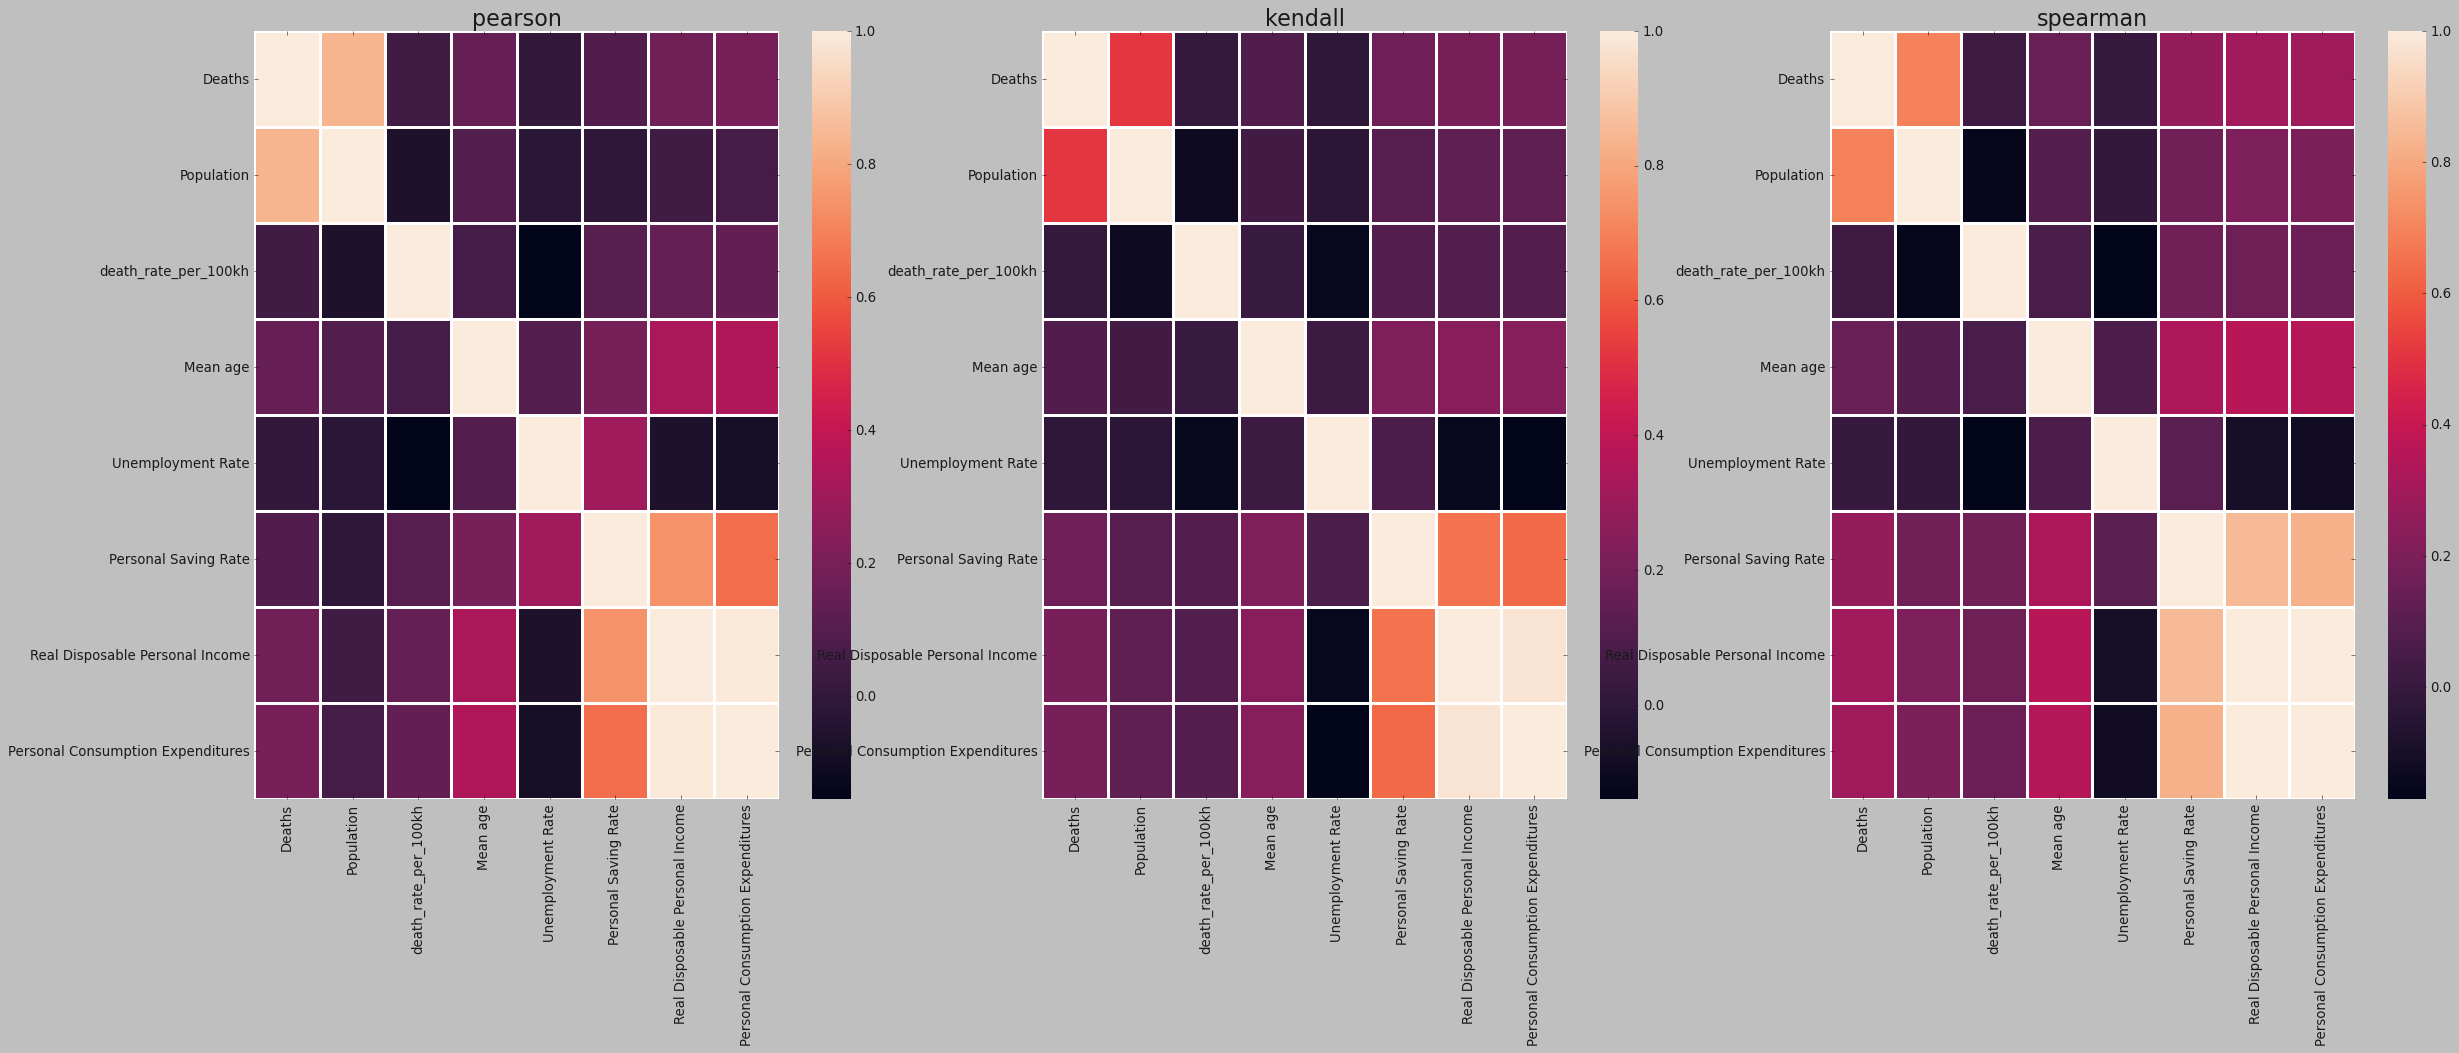

In [76]:
# Generación de los gráficos de correlación entre los 3 métodos: 

plt.figure(figsize=(36,12))

for j,i in enumerate(['pearson','kendall','spearman']):

    plt.subplot(1,3,j+1)
    correlation = full_df_with_economics_drop_cat.corr(method=i)
    sns.heatmap(correlation, linewidth = 1)
    plt.title(i, fontsize=20)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)

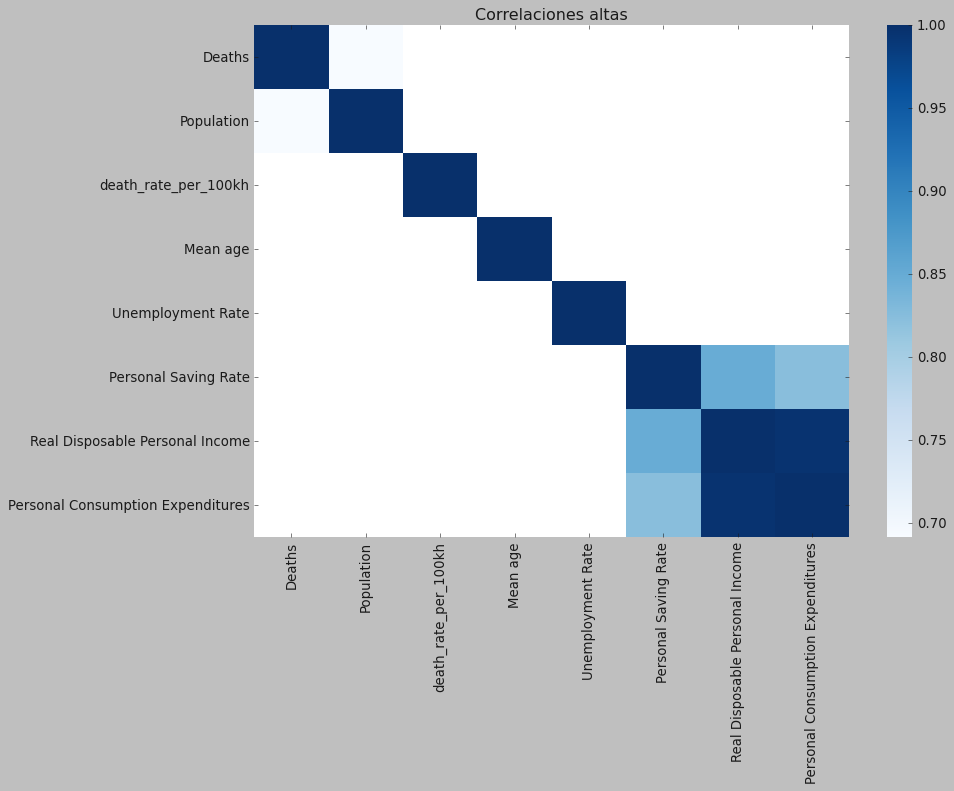

In [77]:
mat_corr_spearman = full_df_with_economics_drop_cat.corr('spearman')

high_corr = mat_corr_spearman[mat_corr_spearman>=.5]
plt.figure(figsize=(12,8))
sns.heatmap(high_corr, cmap="Blues")
plt.title('Correlaciones altas');

In [78]:
# Insight: 
# Vemos que Real Disposable Personal Income y Personal Consumption Expenditures están correlacionadas con el Personal Saving Rate

<Figure size 1120x1120 with 0 Axes>

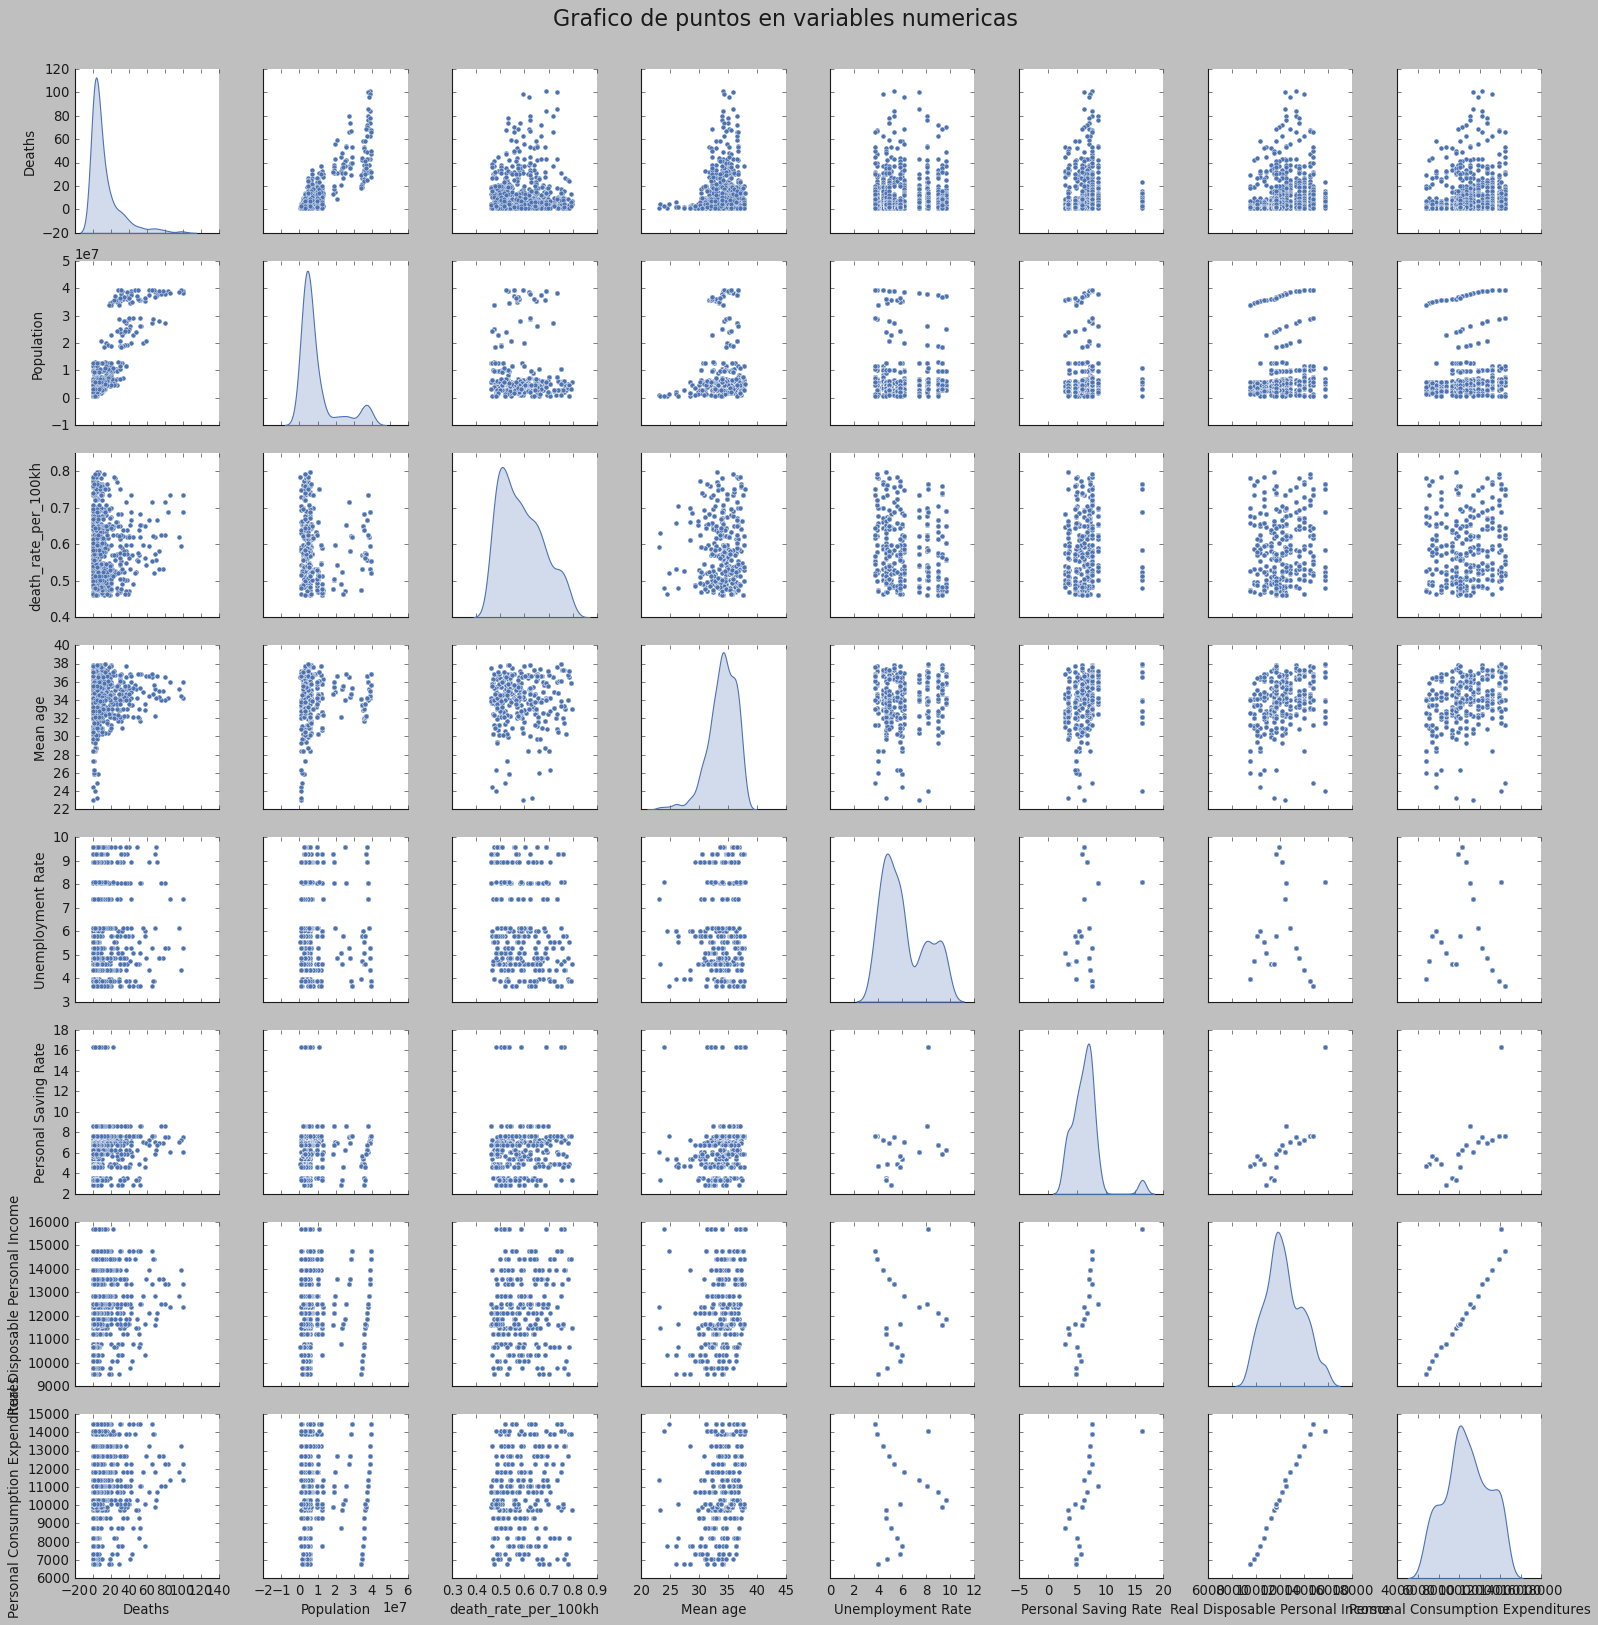

In [79]:
# Scatterplots e histogramas de variables numéricas
plt.figure(figsize=(14, 14))


g = sns.pairplot(full_df_with_economics_drop_cat[['Deaths', 'Population', 'death_rate_per_100kh', 'Mean age', 'Unemployment Rate','Personal Saving Rate','Real Disposable Personal Income','Personal Consumption Expenditures']], diag_kind='kde');
g.fig.suptitle("Grafico de puntos en variables numericas", fontsize=20, y=1.02);

In [80]:
# Insights
# Vemos que no hay correlaciones fuertes entre variables y que la mayoría tienden a la normalidad. 
# Muerte y población tienen sesgo positivo.
# Unemployment rate parece ser bimodal.

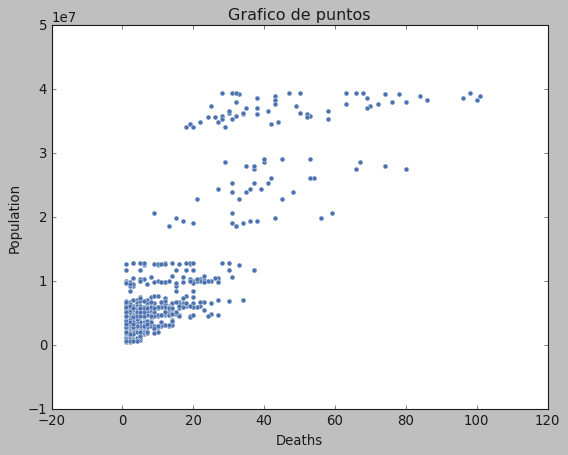

In [81]:
# Numérica vs numérica
sns.scatterplot(x = 'Deaths', y= 'Population', data=full_df_with_economics_drop_cat).set(title="Grafico de puntos");

In [82]:
# Insight:
# No parece haber una correlación lineal entre Población y muertes

C:\Users\Fabir\AppData\Local\Temp\ipykernel_17568\3370980161.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_year = join_states.groupby('Year')['deaths', 'Population'].sum().reset_index()


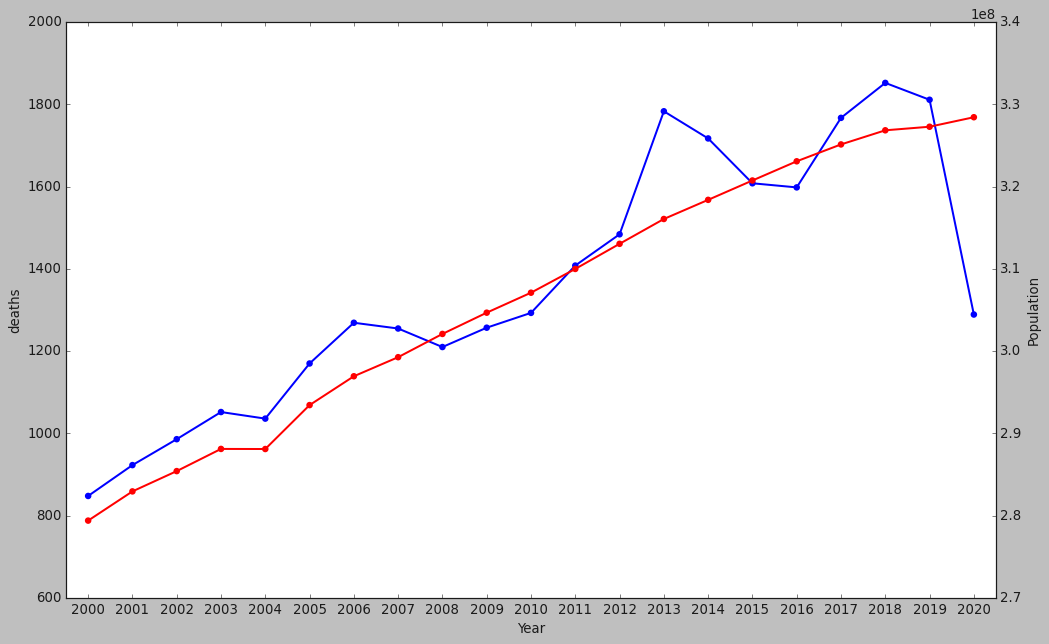

In [83]:
grouped_year = join_states.groupby('Year')['deaths', 'Population'].sum().reset_index()
#graficar
plt.figure(figsize=(15, 9))

#grafico de doble eje x
ax = sns.pointplot(x = 'Year', y = 'deaths', data=grouped_year, color = 'blue', label='Deaths')
ax2 = ax.twinx()
ax = sns.pointplot(x = 'Year', y = 'Population', data=grouped_year,  color = 'red', label='Population', ax=ax2)


In [84]:
# Insight: 
# Podemos ver cierta tendencia a la suba tanto en población como en muertes, pero no tienen el mismo comportamiento.
# Mientras que la población crece más linealmente, las muertes tienen picos y una baja abrupta en 2020 (posiblemente
# por el lockdown)

In [85]:
# Categórico vs numérico
# Tabla de frecuencia bivariada
pd.crosstab(full_df_final['Race'] , full_df_with_economics['Deaths'])

Deaths,1,2,3,4,5,6,7,8,9,10,...,25,27,28,30,31,32,36,38,45,52
Race,,,,,,,,,,,,,,,,,,,,,
African-American/Black,5,4,3,2,3,2,4,1,1,2,...,0,0,0,1,0,0,1,0,1,0
European-American/White,5,4,4,1,3,3,1,0,3,1,...,1,0,1,0,1,0,0,1,0,0
Hispanic/Latino,9,3,4,4,1,3,0,1,0,1,...,0,1,0,0,1,1,0,0,0,1


<AxesSubplot:xlabel='Race', ylabel='Deaths'>

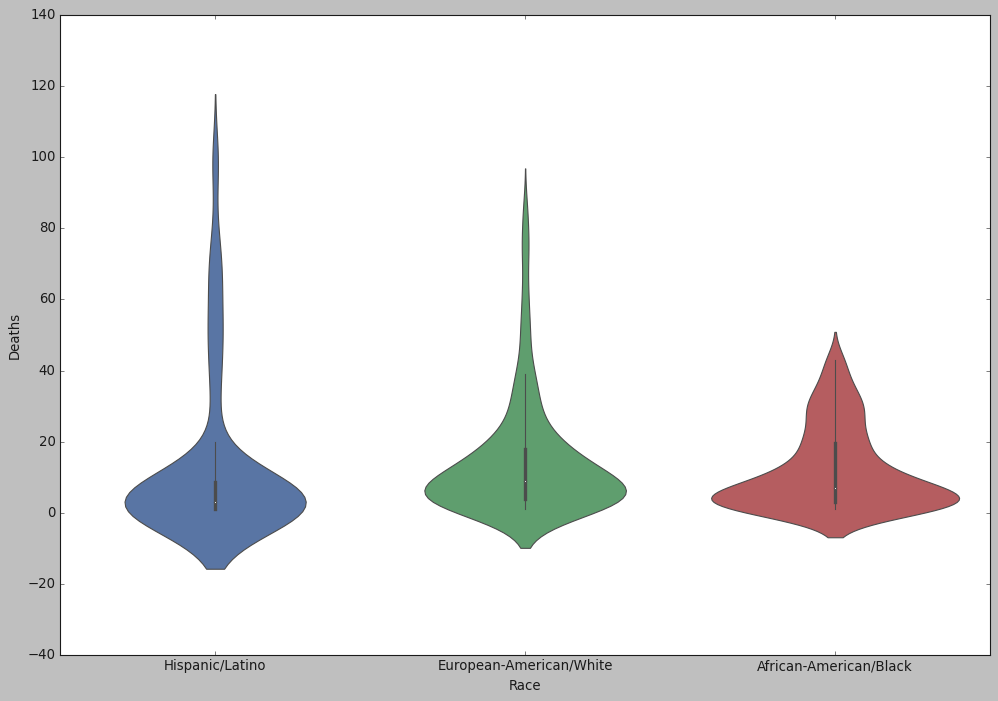

In [86]:
# Gráfico de violín 
plt.figure(figsize=(15,10))
sns.violinplot(x = 'Race', y='Deaths', data=full_df_final)

In [87]:
# Insights
# En todas las etnias vemos una acumulación en los valores bajos pero mayor dispersión en Hispanic/Latino y menor en 
# African-American/Black

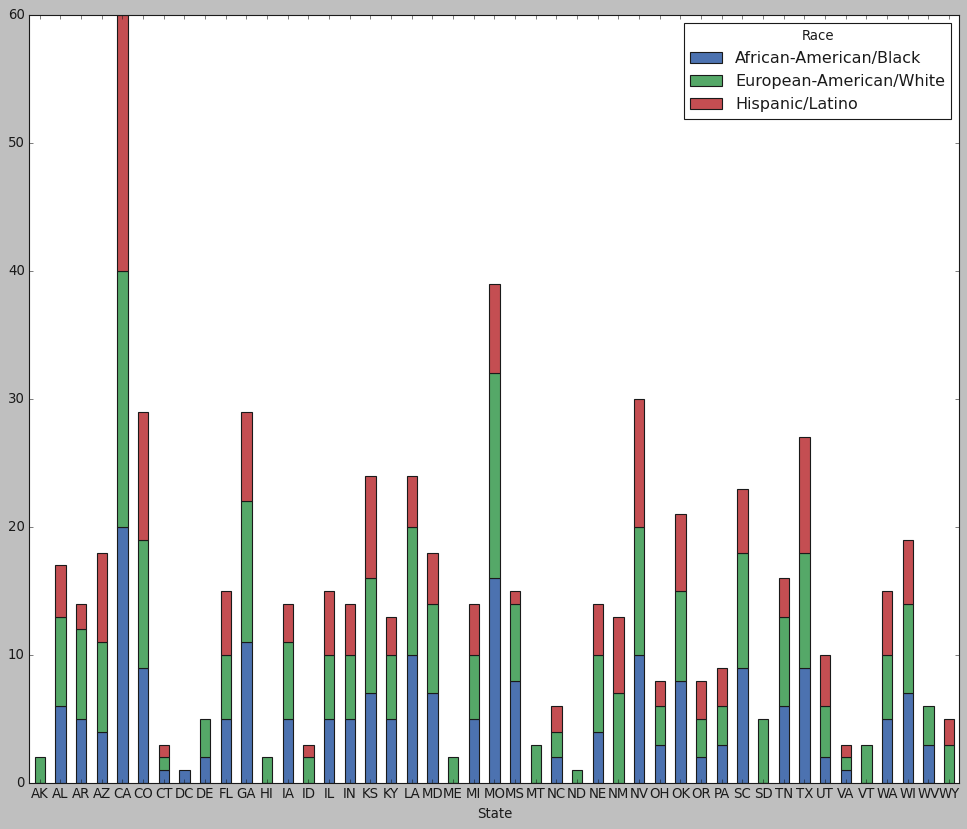

In [88]:
# Categórico vs categórico
cross = pd.crosstab(full_df_final['State'] , full_df_final['Race'])
cross.plot(kind="bar", stacked=True, rot=0, figsize=(15,12));

In [89]:
# Insight:
# Vemos que California tiene mayor población que los demás estados y pareciera tener una distribución equitativa de etnias

In [90]:
# ENTRENAMIENTO DEL MODELO

In [92]:
# Importamos las librerías para entrenar el modelo

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [93]:
# Definimos X

x = full_df_with_economics.drop(columns=['Year','State','Deaths','death_rate_per_100kh'])
x

,Population,Mean age,Race_African-American/Black,Race_European-American/White,Race_Hispanic/Latino,State_label_encoded,Unemployment Rate,Personal Saving Rate,Real Disposable Personal Income,Personal Consumption Expenditures
0,35827943,31.688596,0,0,1,4,5.083333,2.858333,10811.366667,8769.058333
1,35827943,31.688596,0,1,0,4,5.083333,2.858333,10811.366667,8769.058333
2,35827943,31.688596,1,0,0,4,5.083333,2.858333,10811.366667,8769.058333
3,22778123,32.182692,0,1,0,37,5.083333,2.858333,10811.366667,8769.058333
4,22778123,32.182692,0,0,1,37,5.083333,2.858333,10811.366667,8769.058333
...,...,...,...,...,...,...,...,...,...,...
630,5832655,32.120000,0,0,1,42,8.108333,16.308333,15677.350000,14047.550000
631,3249879,32.777778,0,1,0,38,8.108333,16.308333,15677.350000,14047.550000
632,3249879,32.777778,0,0,1,38,8.108333,16.308333,15677.350000,14047.550000
633,3249879,32.777778,1,0,0,38,8.108333,16.308333,15677.350000,14047.550000


In [94]:
# Definimos Y

y= full_df_with_economics.Deaths
y

0      53
1      32
2      28
3      45
4      33
       ..
630     3
631     7
632     3
633     1
634     3
Name: Deaths, Length: 635, dtype: int64

In [95]:
# Separamos la data en train y test

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [100]:
X_train

,Population,Mean age,Race_African-American/Black,Race_European-American/White,Race_Hispanic/Latino,State_label_encoded,Unemployment Rate,Personal Saving Rate,Real Disposable Personal Income,Personal Consumption Expenditures
573,4472345,36.590909,1,0,0,17,3.683333,7.641667,14755.633333,14428.683333
118,11665706,34.666667,0,0,1,30,4.350000,7.275000,13956.716667,13239.108333
4,22778123,32.182692,0,0,1,37,5.083333,2.858333,10811.366667,8769.058333
602,3668976,35.400000,0,1,0,31,5.800000,4.583333,11630.125000,10050.091667
486,2858266,34.071429,1,0,0,16,9.608333,6.233333,11861.325000,10260.266667
...,...,...,...,...,...,...,...,...,...,...
129,10275758,34.604651,0,1,0,25,4.350000,7.275000,13956.716667,13239.108333
144,6028186,33.640000,0,0,1,19,4.350000,7.275000,13956.716667,13239.108333
72,1652495,36.250000,0,0,1,13,5.275000,7.541667,13330.075000,12263.483333
235,5352637,32.961538,1,0,0,5,6.158333,7.050000,12821.783333,11847.725000


In [116]:
 #Normalizamos la data de Xtrain, método utilizado: Min-Max
X_train['Population']=(X_train['Population']-X_train['Population'].min())/(X_train['Population'].max()- X_train['Population'].min())
X_train['Mean age']=(X_train['Mean age']-X_train['Mean age'].min())/(X_train['Mean age'].max()- X_train['Mean age'].min())
X_train['Unemployment Rate']= (X_train['Unemployment Rate']-X_train['Unemployment Rate'].min())/(X_train['Unemployment Rate'].max()- X_train['Unemployment Rate'].min())
X_train['Personal Saving Rate']= (X_train['Personal Saving Rate']-X_train['Personal Saving Rate'].min())/(X_train['Personal Saving Rate'].max()- X_train['Personal Saving Rate'].min())
X_train['Real Disposable Personal Income']= (X_train['Real Disposable Personal Income']-X_train['Real Disposable Personal Income'].min())/(X_train['Real Disposable Personal Income'].max()- X_train['Real Disposable Personal Income'].min())
X_train['Personal Consumption Expenditures']= (X_train['Personal Consumption Expenditures']-X_train['Personal Consumption Expenditures'].min())/(X_train['Personal Consumption Expenditures'].max()- X_train['Personal Consumption Expenditures'].min())
X_train

,Population,Mean age,Race_African-American/Black,Race_European-American/White,Race_Hispanic/Latino,State_label_encoded,Unemployment Rate,Personal Saving Rate,Real Disposable Personal Income,Personal Consumption Expenditures
573,0.100459,0.906451,1,0,0,17,0.000000,0.355638,0.850762,1.000000
118,0.285522,0.775708,0,0,1,30,0.112518,0.328377,0.721406,0.844734
4,0.571408,0.606934,0,0,1,37,0.236287,0.000000,0.212131,0.261291
602,0.079791,0.825534,0,1,0,31,0.357243,0.128253,0.344699,0.428495
486,0.058934,0.735264,1,0,0,16,1.000000,0.250929,0.382134,0.455927
...,...,...,...,...,...,...,...,...,...,...
129,0.249763,0.771494,0,1,0,25,0.112518,0.328377,0.721406,0.844734
144,0.140486,0.705951,0,0,1,19,0.112518,0.328377,0.721406,0.844734
72,0.027914,0.883288,0,0,1,13,0.268636,0.348203,0.619944,0.717392
235,0.123106,0.659852,1,0,0,5,0.417722,0.311648,0.537645,0.663127


In [117]:
 #Normalizamos la data de Xtest, método utilizado: Min-Max
X_test['Population']=(X_test['Population']-X_test['Population'].min())/(X_test['Population'].max()- X_test['Population'].min())
X_test['Mean age']=(X_test['Mean age']-X_test['Mean age'].min())/(X_test['Mean age'].max()- X_test['Mean age'].min())
X_test['Unemployment Rate']= (X_test['Unemployment Rate']-X_test['Unemployment Rate'].min())/(X_test['Unemployment Rate'].max()- X_test['Unemployment Rate'].min())
X_test['Personal Saving Rate']= (X_test['Personal Saving Rate']-X_test['Personal Saving Rate'].min())/(X_test['Personal Saving Rate'].max()- X_test['Personal Saving Rate'].min())
X_test['Real Disposable Personal Income']= (X_test['Real Disposable Personal Income']-X_test['Real Disposable Personal Income'].min())/(X_test['Real Disposable Personal Income'].max()- X_test['Real Disposable Personal Income'].min())
X_test['Personal Consumption Expenditures']= (X_test['Personal Consumption Expenditures']-X_test['Personal Consumption Expenditures'].min())/(X_test['Personal Consumption Expenditures'].max()- X_test['Personal Consumption Expenditures'].min())
X_test

,Population,Mean age,Race_African-American/Black,Race_European-American/White,Race_Hispanic/Latino,State_label_encoded,Unemployment Rate,Personal Saving Rate,Real Disposable Personal Income,Personal Consumption Expenditures
101,0.063725,0.522693,0,0,1,23,0.620253,0.242875,0.461269,0.599929
577,0.021492,0.124076,0,1,0,20,0.000000,0.355638,0.850762,1.000000
409,0.100985,0.893588,1,0,0,17,0.201125,0.307931,0.659717,0.773488
499,0.241275,0.825707,0,1,0,21,0.945148,0.223668,0.342778,0.407758
224,0.140025,0.555958,1,0,0,19,0.417722,0.311648,0.537645,0.663127
...,...,...,...,...,...,...,...,...,...,...
616,0.262042,0.942768,0,1,0,10,0.746835,1.000000,1.000000,0.950253
186,0.098867,0.662294,0,0,1,34,0.156118,0.052045,0.279362,0.327622
604,0.081171,0.828448,0,0,1,31,0.357243,0.128253,0.344699,0.428495
68,0.127033,0.967598,0,1,0,5,0.268636,0.348203,0.619944,0.717392


In [118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scal = scaler.fit_transform(X_train)

X_test_scal = scaler.transform(X_test)


In [119]:
# Aplicamos el modelo de regresión lineal
lr = LinearRegression()

# Ajustamos el modelo con X_train y y_train
lr.fit(X_train_scal,y_train)

# Predecimos con X_test
y_test_pred = lr.predict(X_test_scal)

In [120]:
# Importamos y aplicamos las métricas 

from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_test_pred))
print("MSE",mean_squared_error(y_test,y_test_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_test_pred)))
r2 = r2_score(y_test,y_test_pred)
print("R2",r2)

# Antes de los cambios de normalización estaba así: 

# MAE 5.847700431871219
# MSE 65.61398509927882
# RMSE 8.100245990047389
# R2 0.7655496692741136

MAE 5.839503261923577
MSE 65.53687315229378
RMSE 8.095484738562218
R2 0.7658252038487352


Modelo: Regresión Lineal
R-Cuadrado en Train: 0.7404618769065314
R-Cuadrado en Test: 0.7658252038487352


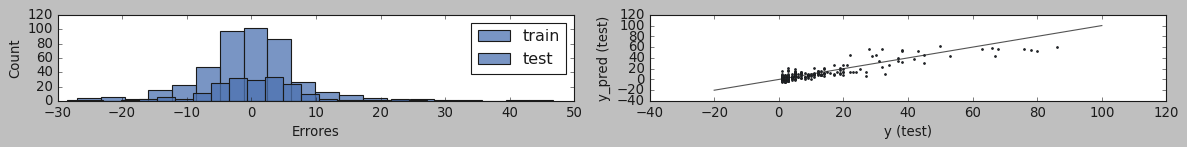

In [121]:
# Se observa un buen R2 para el modelo, vamos a proceder a gráficar los errores y la data con x train y x test

from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error

y_train_pred = lr.predict(X_train_scal)
    
print(f'Modelo: Regresión Lineal')

r_train = metrics.r2_score(y_train, y_train_pred)
r_test = metrics.r2_score(y_test, y_test_pred)
print(f'R-Cuadrado en Train: {r_train}')
print(f'R-Cuadrado en Test: {r_test}')
    
plt.figure(figsize = (15,2))

plt.subplot(1,2,1)
sns.histplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.histplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('Errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]), 
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()


In [123]:
#Obtención de la fórmula y = b + wx
print(lr.coef_) # Devuelve los valores W

[ 14.720105     0.4775693   -0.95358641   1.49898279  -0.64212797
   0.58872577   0.10050056   2.20996077 -13.92990018  15.27150545]


In [126]:
#Obtención de la fórmula y = b + wx
print(lr.intercept_) # Devuelve el valor b

13.36036036036036


In [99]:
# Conclusión: No parece que hay un comportamiento de underfitting u overfitting, 
# se ve un comportamiento en la misma dirección para la data predicha y la data de prueba, 
# hay errores, sin embargo, el r2 da valores que apoyan al modelo.
# Conclusión post data económica: el r2 mejoró y los errores disminuyeron, el comportamiento se mantiene como antes, 
#es decir, no se observa underfitting u overfitting. 